In [1]:
import pandas as pd
import matplotlib.pyplot as plt
# import dask.dataframe as dd
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.colorbar import ColorbarBase


ModuleNotFoundError: No module named 'geopandas'

In [5]:
# police_df = dask.datasets.read_csv('data_clean.csv')
# police_df = police_df[(police_df['month'].str.contains('2021'))]
# police_df = police_df.compute()

AttributeError: module 'dask' has no attribute 'dataframe'

In [46]:
header = pd.read_csv('data_clean.csv', nrows=1)

In [47]:
chunks = pd.read_csv('data_clean.csv', skiprows= 17500000, chunksize=100000)

In [48]:
police_df = next(chunks)

<ipython-input-48-db1fbd16da3d>:1: DtypeWarning: Columns (10,11,13,14,15,16,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  police_df = next(chunks)


In [49]:
police_df.columns = header.columns

In [50]:
police_df.head()

,Unnamed: 0,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,...,Policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,17973559,NaN,NaN,NaN,NaN,-0.115943,51.337635,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),NaN,Arrest,NaN,NaN
1,17973560,NaN,NaN,NaN,NaN,-0.380210,51.549005,NaN,NaN,NaN,...,NaN,Male,10-17,Black/African/Caribbean/Black British - Any ot...,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,Arrest,NaN,NaN
2,17973561,NaN,NaN,NaN,NaN,-0.178088,51.409804,NaN,NaN,NaN,...,NaN,Male,18-24,Other ethnic group - Not stated,Black,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN
3,17973562,NaN,NaN,NaN,NaN,-0.005273,51.538895,NaN,NaN,NaN,...,NaN,Male,10-17,Other ethnic group - Not stated,Black,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,Arrest,NaN,NaN
4,17973563,NaN,NaN,NaN,NaN,0.077910,51.538377,NaN,NaN,NaN,...,NaN,Male,25-34,White - Any other White background,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,NaN,NaN


In [51]:
police_df = police_df.dropna(subset=['Month'])

In [52]:
police_df = police_df[(police_df['Month'].str.contains('2021'))]

In [54]:
del police_df['Unnamed: 0']

In [55]:
police_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97769 entries, 2231 to 99999
Data columns (total 26 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Crime ID                                  71556 non-null  object 
 1   Month                                     97769 non-null  object 
 2   Reported by                               97769 non-null  object 
 3   Falls within                              97769 non-null  object 
 4   Longitude                                 97769 non-null  float64
 5   Latitude                                  97769 non-null  float64
 6   Location                                  97769 non-null  object 
 7   LSOA code                                 97769 non-null  object 
 8   LSOA name                                 97769 non-null  object 
 9   Crime type                                93642 non-null  object 
 10  Last outcome category               

In [56]:
police_df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,...,Policing operation,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
2231,485cbbda9ccedfec9386031ee07d269fd41af1d0c4e54b...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.328504,50.836656,On or near Boundstone Close,E01031355,Adur 003D,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2232,6e41f7abcd07264824a2330fba6fe5a047cf57a9532196...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.543188,50.813202,On or near Arundel Road,E01031454,Arun 011C,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2233,d9de389476abbc234f347a603d1f79ae88e2a94a4c86e9...,2021-07,Metropolitan Police Service,Metropolitan Police Service,0.862312,51.138136,On or near Barn Platt,E01024029,Ashford 005E,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2234,f9d1abfb8eeb90d3a8e37ff48ed00edce91a33529bbd40...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.838133,51.830231,On or near Aston Close,E01017707,Aylesbury Vale 012C,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235,20fe88d01cbed59d71bcbb0c4787708b27993407f61c39...,2021-07,Metropolitan Police Service,Metropolitan Police Service,-0.833412,51.825905,On or near Hanover Close,E01017708,Aylesbury Vale 012D,Violence and sexual offences,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
inflow_df = pd.read_csv("inflow immigrants.csv")
outflow_df = pd.read_csv("outflow immigrants.csv")
netflow_df = pd.read_csv("net flow immigrants.csv")


In [59]:
inflow_df.head()

,Borough,2003-04,2004-05,2005-06,206-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,City of London,308,385,480,730,419,629,621,899,698,624,698,941,927,756,"1,460","1,232"
1,Barking and Dagenham,"2,298","2,413","2,402","2,819","3,360","3,679","3,878","3,160","2,477","2,272","3,426","3,898","4,689","4,185","3,846","3,760"
2,Barnet,"6,973","8,329","6,862","8,564","8,045","7,931","7,201","8,311","6,766","6,102","7,720","8,636","8,257","7,622","7,085","7,269"
3,Bexley,842,889,"1,017","1,295","1,300","1,348","1,492","1,214",961,969,"1,144","1,284","1,408","1,159","1,273","1,171"
4,Brent,"7,855","9,478","10,426","12,482","12,182","10,281","10,228","8,829","8,046","8,326","11,257","11,727","11,598","10,765","9,182","8,801"


In [60]:
inflow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Borough  34 non-null     object
 1   2003-04  34 non-null     object
 2   2004-05  34 non-null     object
 3   2005-06  34 non-null     object
 4   206-07   34 non-null     object
 5   2007-08  34 non-null     object
 6   2008-09  34 non-null     object
 7   2009-10  34 non-null     object
 8   2010-11  34 non-null     object
 9   2011-12  34 non-null     object
 10  2012-13  34 non-null     object
 11  2013-14  34 non-null     object
 12  2014-15  34 non-null     object
 13  2015-16  34 non-null     object
 14  2016-17  34 non-null     object
 15  2017-18  34 non-null     object
 16  2018-19  34 non-null     object
dtypes: object(17)
memory usage: 4.6+ KB


In [80]:

# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(inflow_df, id_vars='Borough', var_name='Year', value_name='Value')

# Extract the year from the "Year" column
melted_df['Year'] = melted_df['Year'].str.extract('(\d{4}-\d{2})')

# Now you have the "Year" column extracted
# You can group the data by "Borough" and "Year" and aggregate the values
inflow_grouped_df = melted_df.groupby(['Borough', 'Year'])['Value'].sum().reset_index()

In [83]:
inflow_grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Borough  510 non-null    object
 1   Year     510 non-null    object
 2   Value    510 non-null    object
dtypes: object(3)
memory usage: 12.1+ KB


In [81]:
# Melt the DataFrame to convert from wide to long format
melted_df = pd.melt(outflow_df, id_vars='Borough', var_name='Year', value_name='Value')

# Extract the year from the "Year" column
melted_df['Year'] = melted_df['Year'].str.extract('(\d{4}-\d{2})')

# Now you have the "Year" column extracted
# You can group the data by "Borough" and "Year" and aggregate the values
outflow_grouped_df = melted_df.groupby(['Borough', 'Year'])['Value'].sum().reset_index()

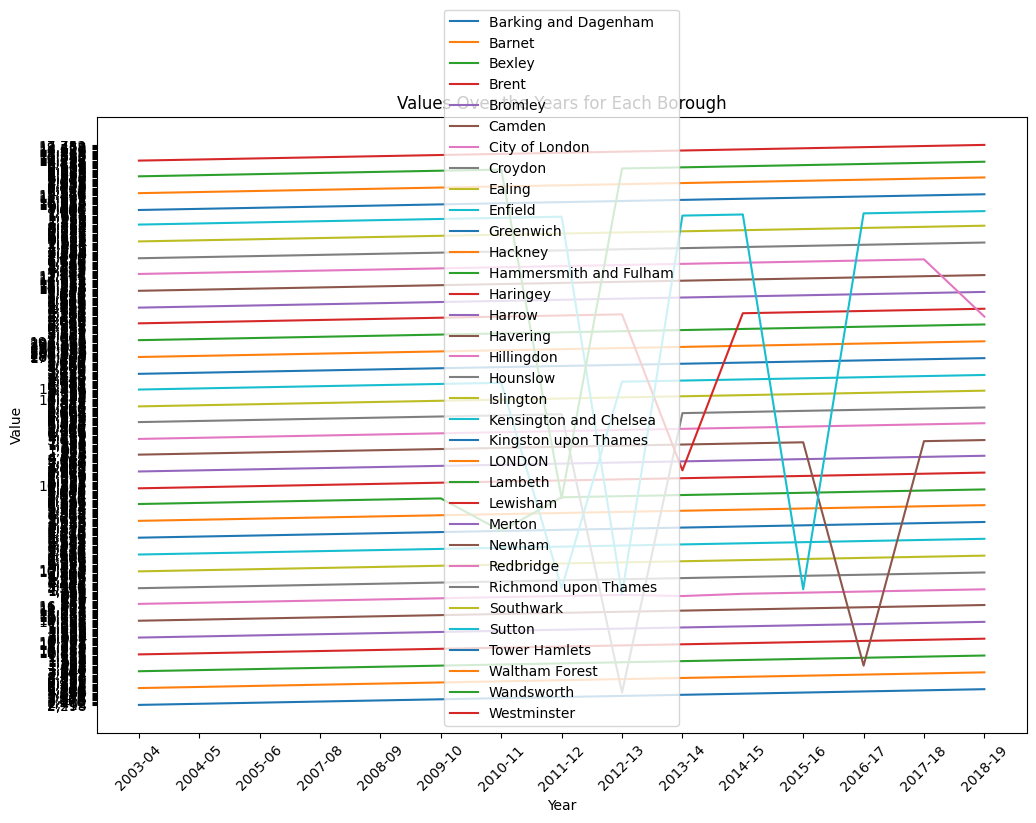

In [69]:
# # Convert "Year" column to datetime for proper sorting
# inflow_grouped_df['Year'] = pd.to_datetime(inflow_grouped_df['Year'])

# Create a figure and axis objects
fig, ax = plt.subplots(figsize=(12, 8))

# Iterate through each borough and plot its values over the years
for borough in inflow_grouped_df['Borough'].unique():
    # Filter data for the current borough
    borough_data = inflow_grouped_df[inflow_grouped_df['Borough'] == borough]
    
    # Plot the data
    ax.plot(borough_data['Year'], borough_data['Value'], label=borough)

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Value')
ax.set_title('Inflow Over the Years for Each Borough')
ax.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

In [74]:
# Load London Borough boundaries
borough_geo = gpd.read_file('./statistical-gis-boundaries-london/ESRI/OA_2011_London_gen_MHW.shp')


In [75]:
borough_geo

,OA11CD,LSOA11CD,MSOA11CD,WD11CD_BF,WD11NM_BF,LAD11CD,LAD11NM,RGN11CD,RGN11NM,LSOA11NM,MSOA11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E00023264,E01004612,E02000954,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 032C,Wandsworth 032,462,459,3,115.2,143,3.2,"POLYGON ((527635.452 171810.058, 527495.957 17..."
1,E00003359,E01000692,E02000128,E05000111,Chislehurst,E09000006,Bromley,E12000007,London,Bromley 002D,Bromley 002,269,259,10,36.7,133,1.9,"POLYGON ((543581.516 171132.486, 543704.000 17..."
2,E00023266,E01004615,E02000956,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 034B,Wandsworth 034,277,277,0,183.4,133,2.1,"POLYGON ((526613.539 171839.165, 526546.840 17..."
3,E00020264,E01004027,E02000809,E05000548,Riverside,E09000028,Southwark,E12000007,London,Southwark 003E,Southwark 003,415,415,0,96.1,191,2.2,"POLYGON ((533563.521 179695.146, 533351.118 17..."
4,E00023263,E01004613,E02000955,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 033D,Wandsworth 033,304,304,0,165.2,131,2.3,"POLYGON ((527822.000 172020.000, 527979.000 17..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25048,E00004047,E01000828,E02000137,E05000126,Shortlands,E09000006,Bromley,E12000007,London,Bromley 011E,Bromley 011,349,349,0,43.7,117,3.0,"POLYGON ((539163.316 168360.071, 539026.000 16..."
25049,E00007044,E01001420,E02000296,E05000196,Cockfosters,E09000010,Enfield,E12000007,London,Enfield 020B,Enfield 020,288,288,0,30.5,114,2.5,"POLYGON ((528811.000 195161.000, 528814.206 19..."
25050,E00003854,E01000791,E02000155,E05000122,Orpington,E09000006,Bromley,E12000007,London,Bromley 029E,Bromley 029,284,284,0,32.1,126,2.3,"POLYGON ((546965.963 166027.878, 546947.923 16..."
25051,E00014344,E01002862,E02000590,E05000390,Hans Town,E09000020,Kensington and Chelsea,E12000007,London,Kensington and Chelsea 014E,Kensington and Chelsea 014,452,452,0,22600.0,384,1.2,"POLYGON ((527325.087 178641.434, 527321.728 17..."


In [84]:
# Merge the GeoDataFrame with your DataFrame containing the aggregated values per borough and year
merged_df = borough_geo.merge(inflow_grouped_df, left_on='LAD11NM', right_on='Borough')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
merged_df.plot(column='Value', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and axis labels
ax.set_title('Inflow of Immigrants by London Boroughs', fontdict={'fontsize': '14', 'fontweight' : '3'})
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Create colorbar
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])  # [left, bottom, width, height]
norm = Normalize(vmin=merged_df['Value'].min(), vmax=merged_df['Value'].max())
cbar = ColorbarBase(cax, cmap='OrRd', norm=norm)
cbar.set_label('Values')

# Show plot
plt.show()

ValueError: could not convert string to float: '1,001'